In [3]:
!pip install praw

In [3]:
import requests
import requests.auth
import pandas as pd
from newspaper import Article 
import praw
import json
with open('config.json') as f:
    data = json.load(f)
reddit_cred = data['Reddit']
watson_cred = data['Watson']
newspaper_cred = data['News']
sql_cred = data['SQL']

## skip the following unless you wanna scrape new stuff

In [5]:
reddit = praw.Reddit(**reddit_cred)

import nltk

import re
# nltk.download()
from praw.models import MoreComments
comment_dict = { "post_id":[], 
                  'post_title':[],

                "id": [],
                        "author":[], 
                        "body":[],
                        "created": [],
                         'score':[],
                 'is_submitter':[],
                  'parent_id':[]}
topics_dict = { "title":[], 
                "score":[], 
                "id":[], "url":[], 
                "comms_num": [], 
                "created": [], 
                "body":[],
                "image":[],
                "keywords":[],
                "summary":[]
                  }
for submission in reddit.subreddit('news').controversial(time_filter = 'month', limit=300):
    submission.comment_sort = 'best'
    article = Article(submission.url)
    try:
        article.download()
        article.parse()
        article.nlp()
    except:
        continue
    topics_dict["title"].append(re.sub(r'[^\x00-\x7F]', '', submission.title.replace('"', "'")))
    topics_dict["score"].append(submission.score)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(re.sub(r'[^\x00-\x7F]', '',article.text.replace('"', "'")))
    topics_dict["image"].append(article.top_image)
    topics_dict["keywords"].append(', '.join(article.keywords).replace('"', "'"))
    topics_dict["summary"].append(re.sub(r'[^\x00-\x7F]', '', article.summary.replace('"', "'")))
    
    try:
        submission.comments.replace_more(limit=None)
    except AssertionError:
        continue
    for top_level_comment in submission.comments.list():
#         print(top_level_comment.parent.id)
#         print(len(submission.comments.list()))
        comment_dict['post_id'].append(submission.id)
        comment_dict['is_submitter'].append(top_level_comment.is_submitter)
        comment_dict['id'].append(top_level_comment.id)
        comment_dict['author'].append(top_level_comment.author)
        comment_dict['body'].append(re.sub(r'[^\x00-\x7F]', '', top_level_comment.body))
        comment_dict['score'].append(top_level_comment.score)
        comment_dict['created'].append(top_level_comment.created_utc)
        comment_dict['parent_id'].append(top_level_comment.parent_id)
        comment_dict['post_title'].append(submission.title)

#         for second_level_comment in top_level_comment.replies:
#             comment_dict['post_id'].append(submission.id)
#             comment_dict['id'].append(second_level_comment.id)
#             comment_dict['body'].append(re.sub(r'[^\x00-\x7F]', '',second_level_comment.body))
#             comment_dict['score'].append(second_level_comment.score)
#             comment_dict['is_submitter'].append(second_level_comment.is_submitter)
#             comment_dict['parent_id'].append(top_level_comment.id)
#             comment_dict['created'].append(second_level_comment.created_utc)
#             comment_dict['post_title'].append(submission.title)
#             try:
#                 comment_dict['author'].append(second_level_comment.author.name)
#             except:
#                 comment_dict['author'].append('None')
        print(len(comment_dict['post_id']))

        if len(comment_dict['post_id']) == 29000:
        
            comment_data = pd.DataFrame(comment_dict)
            topics_data = pd.DataFrame(topics_dict)
            


In [7]:
'Hundreds mourn 22-year-old "disabled" Palestinian shot dead by Israeli army'.replace('"', '\'')

"Hundreds mourn 22-year-old 'disabled' Palestinian shot dead by Israeli army"

## Start here, reading articles and convertingtime

In [1]:
from pandas import Series, DataFrame, Panel
import numpy as np

In [4]:
from sqlalchemy import create_engine
conn_string = 'mysql://{user}:{password}@{host}/{db}?charset=utf8mb4'.format(
    host = sql_cred["host"], 
    user = sql_cred["user"],
    password = sql_cred["password"], 
    db = 'MemeNews')
engine = create_engine(conn_string)

q = '''select * from every_comment'''

In [5]:
df = pd.read_sql(q, con = engine)

In [6]:
df['created'] = pd.to_datetime(df['created'], unit='s')
# df = df.set_index('created')

# https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730

In [7]:
documents = list(df.body)

In [8]:
# from sklearn.datasets import fetch_20newsgroups

# dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
# documents = dataset.data
len(documents)

29000

In [9]:

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()
tf_feature_names

['000',
 '10',
 '100',
 '11',
 '12',
 '15',
 '18',
 '20',
 '2017',
 '2018',
 '21',
 '22',
 '30',
 '4chan',
 '50',
 'ability',
 'able',
 'absolutely',
 'abuse',
 'accept',
 'access',
 'according',
 'account',
 'act',
 'action',
 'actions',
 'active',
 'actively',
 'actual',
 'actually',
 'administration',
 'admit',
 'age',
 'ago',
 'agree',
 'alcohol',
 'alien',
 'aliens',
 'allow',
 'allowed',
 'alt',
 'amendment',
 'america',
 'american',
 'americans',
 'animal',
 'animals',
 'answer',
 'anti',
 'anymore',
 'apparently',
 'apply',
 'area',
 'areas',
 'aren',
 'arent',
 'argue',
 'arguing',
 'argument',
 'arms',
 'article',
 'articles',
 'ask',
 'asked',
 'asking',
 'ass',
 'assault',
 'asshole',
 'assume',
 'assuming',
 'asylum',
 'attack',
 'attacks',
 'attempt',
 'attention',
 'authority',
 'automatic',
 'average',
 'avoid',
 'aware',
 'away',
 'babies',
 'baby',
 'bad',
 'ballots',
 'ban',
 'banned',
 'based',
 'basic',
 'basically',
 'bear',
 'behavior',
 'beliefs',
 'believe',
 '

In [13]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 20

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
# def display_topics(model, feature_names, no_top_words):
#     for topic_idx, topic in enumerate(model.components_):
#         print ('''Topic+ '''+str(topic_idx)+' '.join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
#         print ()

# no_top_words = 10
# display_topics(nmf, tfidf_feature_names, no_top_words)
# display_topics(lda, tf_feature_names, no_top_words)
# display_topics(nmf, tfidf_feature_names, no_top_words)


In [11]:
# !pip install pyldavis

    100% |████████████████████████████████| 1.6MB 6.1MB/s ta 0:00:011
    100% |████████████████████████████████| 276kB 6.1MB/s ta 0:00:01
    100% |████████████████████████████████| 829kB 5.1MB/s ta 0:00:011
  Running setup.py bdist_wheel for pyldavis ... done
  Stored in directory: /Users/37138/Library/Caches/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /Users/37138/Library/Caches/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built pyldavis future


In [16]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.sklearn.prepare(lda, dtm_poems, dtm_vectorizer, mds='tsne')

NameError: name 'dtm_poems' is not defined

In [15]:
pyLDAvis.enable_notebook()

In [18]:
# len(df[df.index.day == 25])
test = pd.DataFrame(df, index=df.index) 
a = test.hist(bins=len(df.index))
a

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a48e550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a2a5b7320>]], dtype=object)

In [17]:
daily_comments = df.groupby(df.index.date)['score'].sum()
daily_comments.plot(kind='line')

AttributeError: 'RangeIndex' object has no attribute 'date'

In [ ]:
daily_comments = df.groupby(df.index.date)['score'].count()
daily_comments.plot(kind='bar')

In [30]:
ndf = df.pivot_table(index=['created'], 
                    columns='title',
                    aggfunc='size')
ndf

title,'Baby It's Cold Outside' cut from Cleveland radio station after #MeToo,'Everything is a target': Gaza residents decry Israeli strikes,'I Cannot Enforce This Law': Police Chief Pushes Back on Washington's New Gun Restrictions,"'I'm ready,' Mexican citizen says before being executed in Texas for killing of wife, kids",'They Didn't Want a Flag': Protesters Vandalize Patriotic Mural Painted on NY Pizza Shop,'World's oldest rebel' war veteran dies,"'You're a terrorist,' says note sent to 10-year-old Muslim schoolgirl in Massachusetts","1 shot, 1 injured in road rage shooting while in line for Zoo Lights","2 California teens killed execution-style in triple slaying in Mexico, reports say","2,550 US citizens applied for asylum in Canada in 2017. That's more than 6 times as many as in 2016",...,"White House backs down from legal fight, restores Jim Acosta's press pass",Woman Who Popped Open Some Pringles Before Paying Will Be Jailed the Day the Fun Stops,Woman booked into Miami mens jail after she was wrongly deemed transgender has lawsuit upheld,"Woman goes on racist, homophobic rant on plane, reportedly threatens a flight attendant","Woman in alleged GoFundMe scam claims she was set up by boyfriend, homeless man",Woman shot while sitting on porch in St. Pete - Story,"Woman, puppy attacked by pit bulls in Indian Trail, NC",Wonder Woman stuntwoman O'Neil dies,Yaxley dog attack leaves baby in 'critical' condition,Yemen conflict: US defends backing for Saudi-led coalition
created,,,,,,,,,,,,,,,,,,,,,
2018-11-05 23:11:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-06 01:24:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-06 02:57:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-06 03:18:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-06 03:20:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-06 06:49:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-06 08:58:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-06 11:22:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-06 16:32:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
from matplotlib import pyplot
df.index
# df.groupby(df.date).count()

RangeIndex(start=0, stop=277, step=1)

In [ ]:

a = pd.to_datetime(pd.Series(a))
a.index
d = df['created']
df['created'] = pd.to_datetime(df['created'], unit='s')
sort = df.sort_values(by='created')
series = df.set_index('created')

In [96]:

# a

DatetimeIndex(['2018-11-06 18:06:40', '2018-11-11 00:33:37',
               '2018-11-09 18:29:42', '2018-11-06 16:32:16',
               '2018-11-27 00:46:50', '2018-11-12 01:15:51',
               '2018-11-15 09:43:24', '2018-11-12 06:19:37',
               '2018-11-28 04:34:38', '2018-11-08 19:12:05',
               ...
               '2018-11-09 12:48:10', '2018-12-01 05:40:46',
               '2018-12-04 11:18:50', '2018-12-04 09:49:26',
               '2018-11-25 10:13:53', '2018-11-21 10:09:55',
               '2018-12-02 02:36:57', '2018-12-05 00:38:26',
               '2018-11-07 04:42:06', '2018-11-25 05:14:05'],
              dtype='datetime64[ns]', name='created', length=277, freq=None)

In [63]:
import matplotlib.pyplot as plt
ts = Series(df['created'])
ts

NameError: name 'Series' is not defined

In [37]:
import numpy as np

dt = pd.to_datetime(df['created'])


0     1970-01-01 00:00:01.541527600
1     1970-01-01 00:00:01.541896417
2     1970-01-01 00:00:01.541788182
3     1970-01-01 00:00:01.541521936
4     1970-01-01 00:00:01.543279610
5     1970-01-01 00:00:01.541985351
6     1970-01-01 00:00:01.542275004
7     1970-01-01 00:00:01.542003577
8     1970-01-01 00:00:01.543379678
9     1970-01-01 00:00:01.541704325
10    1970-01-01 00:00:01.542703293
11    1970-01-01 00:00:01.542163382
12    1970-01-01 00:00:01.543385451
13    1970-01-01 00:00:01.542327486
14    1970-01-01 00:00:01.543342996
15    1970-01-01 00:00:01.542855142
16    1970-01-01 00:00:01.541795760
17    1970-01-01 00:00:01.542926561
18    1970-01-01 00:00:01.543446622
19    1970-01-01 00:00:01.543630341
20    1970-01-01 00:00:01.543483721
21    1970-01-01 00:00:01.542373454
22    1970-01-01 00:00:01.543605384
23    1970-01-01 00:00:01.543946537
24    1970-01-01 00:00:01.542114047
25    1970-01-01 00:00:01.541552575
26    1970-01-01 00:00:01.542825441
27    1970-01-01 00:00:01.54

In [20]:
comment_data['created']

0       1970-01-01 00:00:01.541504467
1       1970-01-01 00:00:01.541506804
2       1970-01-01 00:00:01.541518260
3       1970-01-01 00:00:01.541523104
4       1970-01-01 00:00:01.541873642
5       1970-01-01 00:00:01.541903999
6       1970-01-01 00:00:01.541868747
7       1970-01-01 00:00:01.541949178
8       1970-01-01 00:00:01.541952652
9       1970-01-01 00:00:01.542052633
10      1970-01-01 00:00:01.542158019
11      1970-01-01 00:00:01.542219048
12      1970-01-01 00:00:01.541904328
13      1970-01-01 00:00:01.541879001
14      1970-01-01 00:00:01.541867767
15      1970-01-01 00:00:01.541869154
16      1970-01-01 00:00:01.541868038
17      1970-01-01 00:00:01.541868068
18      1970-01-01 00:00:01.541868353
19      1970-01-01 00:00:01.541885841
20      1970-01-01 00:00:01.541952574
21      1970-01-01 00:00:01.541885743
22      1970-01-01 00:00:01.541891938
23      1970-01-01 00:00:01.541919580
24      1970-01-01 00:00:01.541931118
25      1970-01-01 00:00:01.541874496
26      1970

In [18]:
comment_data['created'] = 

0       1970-01-01 00:00:01.541504467
1       1970-01-01 00:00:01.541506804
2       1970-01-01 00:00:01.541518260
3       1970-01-01 00:00:01.541523104
4       1970-01-01 00:00:01.541873642
5       1970-01-01 00:00:01.541903999
6       1970-01-01 00:00:01.541868747
7       1970-01-01 00:00:01.541949178
8       1970-01-01 00:00:01.541952652
9       1970-01-01 00:00:01.542052633
10      1970-01-01 00:00:01.542158019
11      1970-01-01 00:00:01.542219048
12      1970-01-01 00:00:01.541904328
13      1970-01-01 00:00:01.541879001
14      1970-01-01 00:00:01.541867767
15      1970-01-01 00:00:01.541869154
16      1970-01-01 00:00:01.541868038
17      1970-01-01 00:00:01.541868068
18      1970-01-01 00:00:01.541868353
19      1970-01-01 00:00:01.541885841
20      1970-01-01 00:00:01.541952574
21      1970-01-01 00:00:01.541885743
22      1970-01-01 00:00:01.541891938
23      1970-01-01 00:00:01.541919580
24      1970-01-01 00:00:01.541931118
25      1970-01-01 00:00:01.541874496
26      1970

In [13]:
from sqlalchemy import create_engine
conn_string = 'mysql://{user}:{password}@{host}/{db}?charset=utf8mb4'.format(
    host = sql_cred["host"], 
    user = sql_cred["user"],
    password = sql_cred["password"], 
    db = 'MemeNews')
engine = create_engine(conn_string)

comment_data.to_sql('every_comment', index=True, con = engine, if_exists='append')
# comment_data.to_sql('all_comments', index=True, con = engine, if_exists='append')
# engine.execute('select * from articles').fetchall()

In [ ]:
#  comment_dict = { "post_id":[], 
#                   'post_title':[],

#                 "id": [],
#                         "author":[], 
#                         "body":[],
#                         "created": [],
#                          'score':[],
#                  'is_submitter':[],
#                   'parent_id':[]}
                         
                         
# for submission in reddit.subreddit('news').controversial(time_filter = 'year', limit=10000):
#     submission.comment_sort = 'top'
# #     for comment in submission.comments.list():
#     submission.comments.replace_more(limit=0)

            
    
    
#     for top_level_comment in submission.comments:
#         comment_dict['post_id'].append(submission.id)
#         comment_dict['is_submitter'].append(top_level_comment.is_submitter)
#         comment_dict['id'].append(top_level_comment.id)
#         comment_dict['author'].append(top_level_comment.author)
#         comment_dict['body'].append(re.sub(r'[^\x00-\x7F]', '', top_level_comment.body))
#         comment_dict['score'].append(top_level_comment.score)
#         comment_dict['created'].append(top_level_comment.created_utc)
#         comment_dict['parent_id'].append('None')
#         comment_dict['post_title'].append(submission.title)

#         for second_level_comment in top_level_comment.replies:
#             comment_dict['post_id'].append(submission.id)
#             comment_dict['id'].append(second_level_comment.id)
#             comment_dict['body'].append(re.sub(r'[^\x00-\x7F]', '',second_level_comment.body))
#             comment_dict['score'].append(second_level_comment.score)
#             comment_dict['is_submitter'].append(second_level_comment.is_submitter)
#             comment_dict['parent_id'].append(top_level_comment.id)
#             comment_dict['created'].append(second_level_comment.created_utc)
#             comment_dict['post_title'].append(submission.title)
#             try:
#                 comment_dict['author'].append(second_level_comment.author.name)
#             except:
#                 comment_dict['author'].append('None')


# #             print(comment_dict)
#     comment_data = pd.DataFrame(comment_dict)
# #         prin
# comment_data

In [ ]:
comment_data['post_id'][0]

In [ ]:
for i, row in df.iterrows():
    row['body']
# # comment_data.to_sql('top_comments', index=True, con = engine, if_exists='append')

## Start K-MEANS analysis here

In [1]:
# comment_data = comment_data.drop_duplicates('body')
# df = comment_data[comment_data['body']!='None']
df = df[df['body']!='[removed]']
df

NameError: name 'df' is not defined

In [121]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

In [122]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
bodies = df['body'].values
# parent_bodies = parent['body'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(bodies)


In [123]:
word_features = vectorizer.get_feature_names()
# word_features


In [124]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [125]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(bodies)
word_features2 = vectorizer2.get_feature_names()
word_features2[:50]

["'a",
 "'g",
 "'i",
 "'mr",
 "'one",
 "'s",
 "'shut",
 "'u",
 'aa',
 'aaaa',
 'aaaaand',
 'aaaand',
 'aaah',
 'aafa',
 'aafdf',
 'aand',
 'aardvark',
 'aaron',
 'aarp',
 'ab',
 'aba',
 'abandon',
 'abat',
 'abattoir',
 'abbi',
 'abbot',
 'abbrevi',
 'abc',
 'abcd',
 'abcidi',
 'abciseven',
 'abciti',
 'abcnew',
 'abdic',
 'abduct',
 'abe',
 'abel',
 'abet',
 'abf',
 'abhorr',
 'abid',
 'abigail',
 'abil',
 'abject',
 'abjur',
 'abl',
 'abli',
 'abloo',
 'abnorm',
 'aboard']

In [126]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(bodies)
words = vectorizer3.get_feature_names()

In [132]:
kmeans = KMeans(n_clusters = 10, n_init = 5, n_jobs = -1)
kmeans.fit(X3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=5, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [133]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : right, wing, peopl, just, constitut, alt, you'r, make, becaus, don't
1 : just, don't, think, becaus, whi, say, make, know, i'm, fuck
2 : delet, account, just, final, fine, firearm, fit, fix, flag, zero
3 : law, gun, enforc, state, peopl, asylum, constitut, say, don't, just
4 : articl, read, did, comment, say, didn't, headlin, just, said, news
5 : like, sound, just, don't, peopl, look, make, feel, someth, becaus
6 : tax, pay, report, incom, ir, peopl, women, just, don't, make
7 : thing, vote, trump, elect, republican, democrat, just, count, onli, say
8 : dog, pit, bull, breed, attack, anim, pitbul, bite, peopl, babi
9 : peopl, just, think, don't, becaus, make, say, want, like, know


In [134]:
df['cluster'] = kmeans.labels_
clusters = df.groupby(['cluster']).size()
clusters

C:\Users\Artem\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


cluster
0     1344
1    16637
2      713
3     1509
4      667
5     1829
6      814
7     1420
8      503
9     3054
dtype: int64

In [130]:

df[df['cluster'] == 4]['body']

created
2018-11-06 11:41:07    [deleted]
2018-11-11 10:11:58    [deleted]
2018-11-10 17:23:45    [deleted]
2018-11-11 16:49:03    [deleted]
2018-11-10 17:44:23    [deleted]
2018-11-11 20:08:54    [deleted]
2018-11-09 14:29:24    [deleted]
2018-11-09 14:05:32    [deleted]
2018-11-09 11:17:36    [deleted]
2018-11-09 14:20:57    [deleted]
2018-11-09 12:30:26    [deleted]
2018-11-09 14:32:43    [deleted]
2018-11-06 08:55:20    [deleted]
2018-11-26 23:48:41    [deleted]
2018-11-11 18:23:16    [deleted]
2018-11-20 16:07:37    [deleted]
2018-11-20 01:17:50    [deleted]
2018-11-20 17:38:56    [deleted]
2018-11-20 21:22:37    [deleted]
2018-11-13 19:28:51    [deleted]
2018-11-27 22:31:06    [deleted]
2018-11-15 21:49:15    [deleted]
2018-11-15 17:02:27    [deleted]
2018-11-15 17:05:08    [deleted]
2018-11-15 17:05:35    [deleted]
2018-11-15 20:29:44    [deleted]
2018-11-15 22:50:27    [deleted]
2018-11-16 10:17:08    [deleted]
2018-11-09 12:39:10    [deleted]
2018-11-09 13:16:04    [deleted]
  

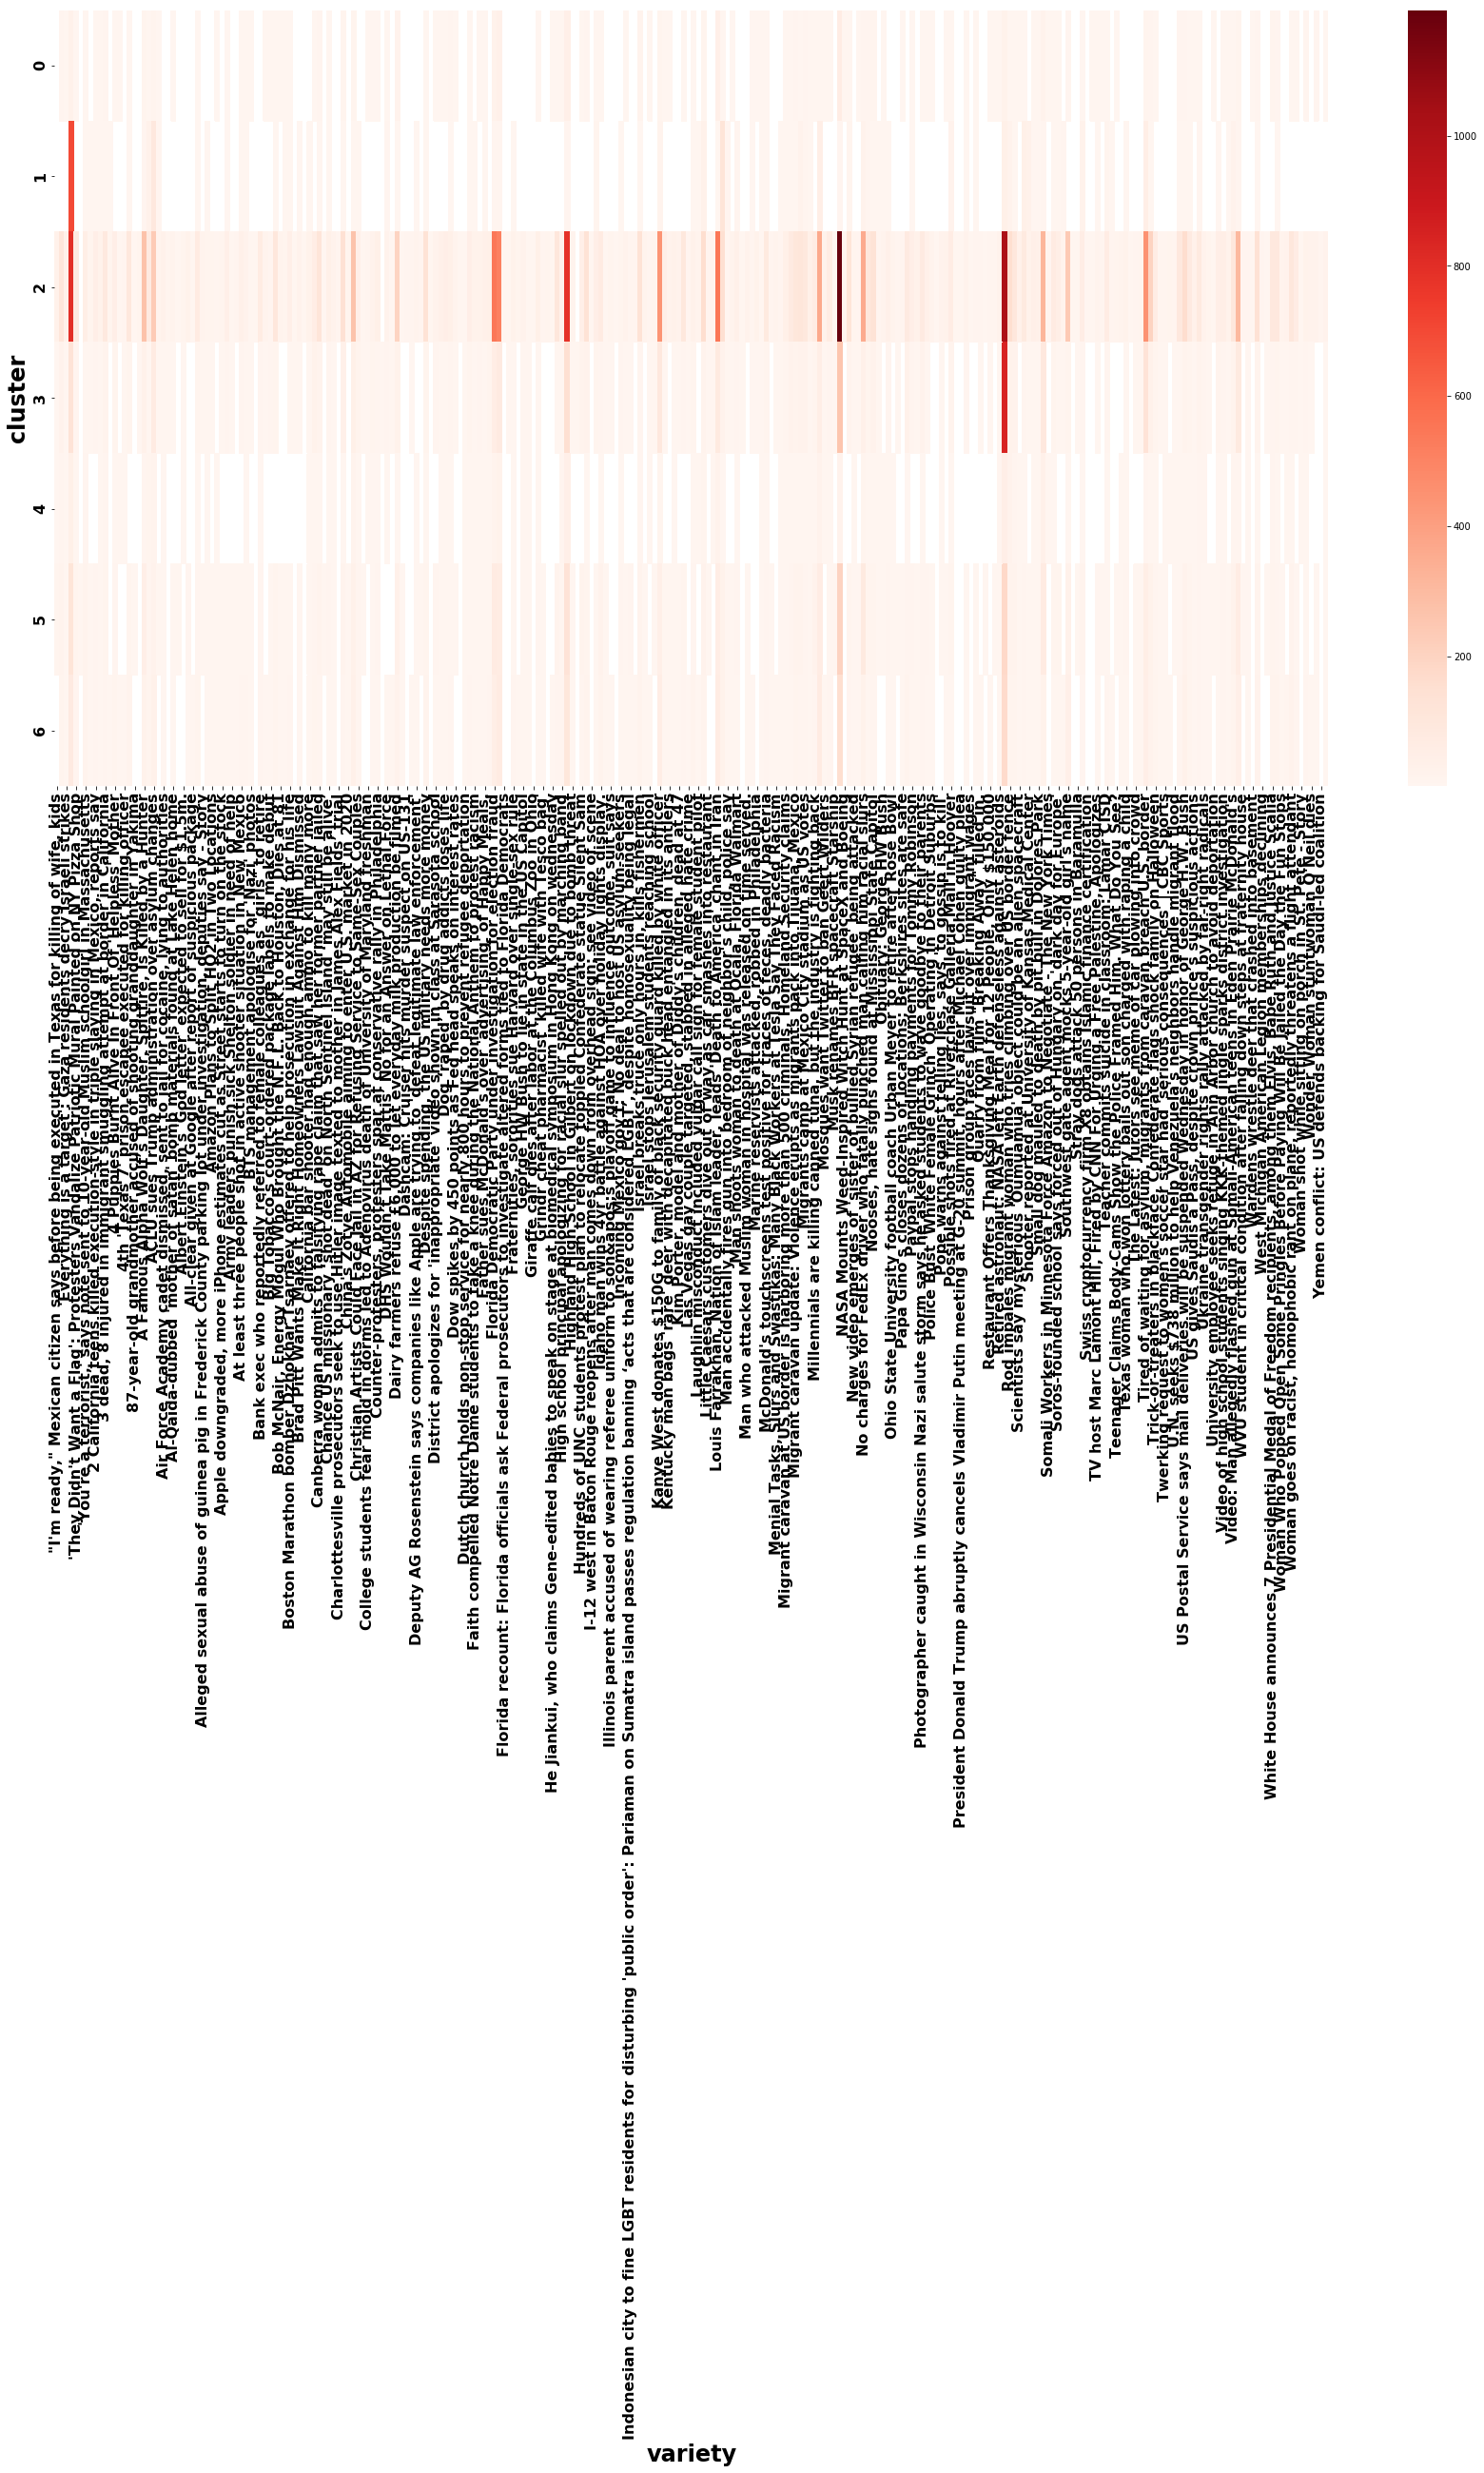

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

clusters = df.groupby(['cluster', 'post_title']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'post_title'), ax = ax2, cmap = 'Reds')

ax2.set_xlabel('variety', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")